In [1]:
import numpy as np
import matplotlib.pyplot as plt

from json import loads
from sklearn.datasets import make_regression

# from linear_regression import LinearRegression
from problem_1 import GradientDescent1, StochasticGradientDescent1, RidgeGradientDescent1, LassoGradientDescent1

Set parameters

In [2]:
with open('problem_1.json', 'r') as file:
    param = file.read()
param = loads(param)

Make dataset

In [3]:
X, y = make_regression(**param['dataset'])

Init models

In [4]:
# regression = LinearRegression()

descent = {
    'Base': GradientDescent1(),
    'Stochastic': StochasticGradientDescent1(),
    'Ridge': RidgeGradientDescent1(a=1),
    'Lasso': LassoGradientDescent1(a=1)
}

Fit models and save convergence data

In [5]:
# regression.fit(X, y)

convergence = {key: [] for key in descent.keys()}
for key, model in descent.items():
    model.fit(X, y, save_to=convergence[key], **param['model'])

Prepare convergence data

In [6]:
convergence = {key: np.array(data, dtype=object) for key, data in convergence.items()}

Plot results

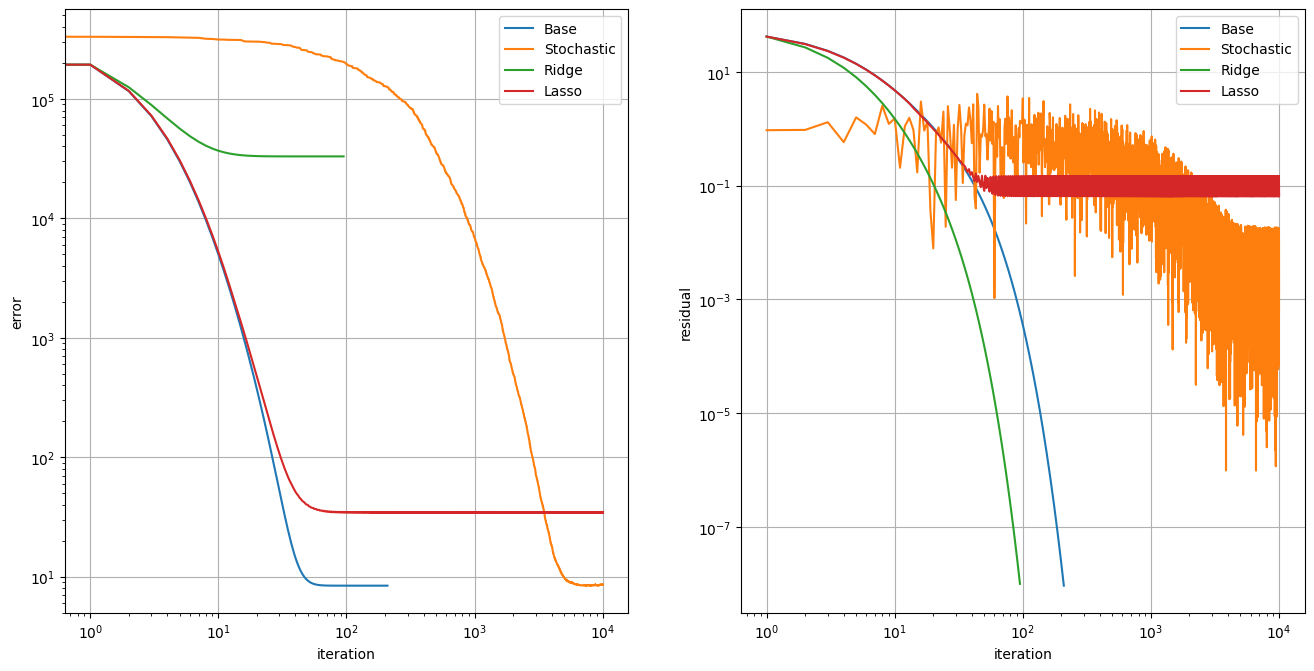

In [7]:
fig, ax = plt.subplots(
    nrows=1, ncols=2,
    figsize=(16, 8), dpi=100
)

variables, index = ('iteration', 'error'), 0
indexes = [param['convergence'][variable] for variable in variables]
for model in convergence:
    data = convergence[model][:, indexes]
    ax[index].plot(*data.transpose(), label=model)
ax[index].set_xscale('log')
ax[index].set_yscale('log')
ax[index].grid()
ax[index].set_xlabel(variables[0])
ax[index].set_ylabel(variables[1])
ax[index].legend()

variables, index = ('iteration', 'residual'), 1
indexes = [param['convergence'][variable] for variable in variables]
for model in convergence:
    data = convergence[model][:, indexes]
    ax[index].plot(*data.transpose(), label=model)
ax[index].set_xscale('log')
ax[index].set_yscale('log')
ax[index].grid()
ax[index].set_xlabel(variables[0])
ax[index].set_ylabel(variables[1])
ax[index].legend()

plt.show()